In [8]:
import pandas as pd
df = pd.read_csv('wine+quality/winequality-white.csv', delimiter=';')
X0 = df.drop(columns=['quality'])
y0 = df['quality']

X = X0.values
print(X.shape)
y = y0.values.reshape(-1, 1)
print(y.shape)

正規化

In [10]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#標準化
scaler = preprocessing.StandardScaler()
#print(X)
scaler.fit(X)
s_x = scaler.transform(X) 
#print(s_x)
scaler.fit(y)
s_y = scaler.transform(y)

X_train, X_test, y_train, y_test = train_test_split(s_x, s_y, test_size=0.2, random_state=1)

ガウス基底

In [29]:
def gaussian_basis(X0, center, sigma):
    diff = X0 - center
    print(X0.shape)
    gaus_X = np.exp(-diff**2 / (2 * sigma**2))
    print(gaus_X.shape)
    return gaus_X

線形回帰

重み計算$$W＝(X^{T}X)^{-1}X^{T}y$$
$$X=(x_{0},...,x_{N})^{T}$$

In [30]:
def linear_regression(X0, y):
    n_points = len(X0)
    gaus_X = gaussian_basis(X0, 0.1, 1)
    X = np.concatenate([np.ones((n_points, 1)), gaus_X], axis=1)
    #Xは[観測数,特徴量]の形だから、X.Tは[特徴量,観測数]の形になる
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    return W

In [31]:
# 重み計算
W = linear_regression(X_train, y_train)
# 予測
# ここは転置する必要がある
pred_y = W.T @ np.concatenate([np.ones((len(X_test), 1)), X_test], axis=1).T
pred_y = pred_y.T

#　誤差
print(mean_squared_error(y_test, pred_y))

#　元に戻す
r_pred = scaler.inverse_transform(pred_y)
r_test = scaler.inverse_transform(y_test)

print(mean_squared_error(r_test, r_pred))

(3918, 11)
(3918, 11)
2.827822511539206
2.2175658227251622


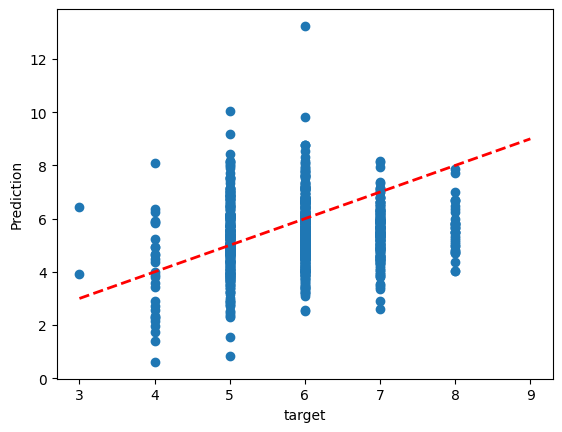

In [32]:
import matplotlib.pyplot as plt
#グラフ表示
plt.scatter(r_test, r_pred) #散布図
plt.xlabel('target')
plt.ylabel('Prediction')

# y=x の補助線を追加
max_val = 9
min_val = 3
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.show()